# Cricket Performance Analysis & Run Prediction

This notebook contains performance analysis for cricket players, ball by ball analysis. Using python and machine learning libraries, we attempt to create match score & status perdiction for each ball for both the innings.

The following approach to be completed:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement, by analyzing the stats provided, predict the score/status of each ball in a match for upcoming season.

## 2. Data

The original data is taken from cricksheet, it shows the records of multiple matches ball by ball data.
https://cricsheet.org/

Columns

match_id  = Match ID(unique id for each match).



## Importing Libraries

In [371]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import glob
import os
import warnings
import seaborn as sns
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from xgboost import XGBRFClassifier
from hyperopt import hp

In [372]:
warnings.filterwarnings('ignore')

## Loading Data

In [373]:
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
        files = glob.glob(os.path.join(root, '*.csv'))
        for f in files:
            all_files.append(os.path.abspath(f))
    return all_files

In [374]:
cricket_data = get_files("D:\datasets\cricket")
cricket_data[:5]

['D:\\datasets\\cricket\\1001349.csv',
 'D:\\datasets\\cricket\\1001351.csv',
 'D:\\datasets\\cricket\\1001353.csv',
 'D:\\datasets\\cricket\\1004729.csv',
 'D:\\datasets\\cricket\\1007655.csv']

In [375]:
li = []
for filename in cricket_data:
    frames = pd.read_csv(filename, index_col=None, header=0, parse_dates= ["start_date"])
    li.append(frames)

df = pd.concat(li, axis=0, ignore_index=True)

## EDA

In [376]:
df.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.1,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.2,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.3,Australia,Sri Lanka,AJ Finch,M Klinger,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.4,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.5,Australia,Sri Lanka,M Klinger,AJ Finch,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [377]:
df.shape

(402021, 22)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   match_id                402021 non-null  int64         
 1   season                  402021 non-null  object        
 2   start_date              402021 non-null  datetime64[ns]
 3   venue                   402021 non-null  object        
 4   innings                 402021 non-null  int64         
 5   ball                    402021 non-null  float64       
 6   batting_team            402021 non-null  object        
 7   bowling_team            402021 non-null  object        
 8   striker                 402021 non-null  object        
 9   non_striker             402021 non-null  object        
 10  bowler                  402021 non-null  object        
 11  runs_off_bat            402021 non-null  int64         
 12  extras                  402021

In [379]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,402011,402012,402013,402014,402015,402016,402017,402018,402019,402020
match_id,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,1001349,...,995469,995469,995469,995469,995469,995469,995469,995469,995469,995469
season,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,2016/17,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
start_date,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,...,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00,2016-09-09 00:00:00
venue,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,...,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium,R Premadasa Stadium
innings,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
ball,0.1,0.2,0.3,0.4,0.5,0.6,1.1,1.2,1.3,1.4,...,16.2,16.3,16.4,16.5,16.6,17.1,17.2,17.3,17.4,17.5
batting_team,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,Australia
bowling_team,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,...,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka
striker,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch,...,MS Wade,TM Head,TM Head,MS Wade,MS Wade,TM Head,PM Nevill,TM Head,TM Head,TM Head
non_striker,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger,...,TM Head,MS Wade,MS Wade,TM Head,TM Head,PM Nevill,TM Head,PM Nevill,PM Nevill,PM Nevill


In [380]:
df["match_id"].unique()

array([1001349, 1001351, 1001353, ...,  967081,  995467,  995469],
      dtype=int64)

### Visualizing the matches score for insights

In [381]:
def status(match):
    match_details = df[df["match_id"] == match]
    first_innings = match_details[match_details["innings"] == 1]
    second_innings = match_details[match_details["innings"] == 2]
    first_innings_score_per_over = []
    second_innings_score_per_over = []
    bat_team_first_innings = first_innings["batting_team"].iloc[0]
    bat_team_second_innings = second_innings["batting_team"].iloc[0]
    
    for i in np.arange(1, 21):
        temp = 0
        for index ,value in enumerate(first_innings["ball"]):
            if value < i and value > i-1:
                temp += first_innings["runs_off_bat"].iloc[index]
        first_innings_score_per_over.append(temp)

    for i in np.arange(1, 21):
        temp = 0
        for index ,value in enumerate(second_innings["ball"]):
            if value < i and value > i-1:
                temp += second_innings["runs_off_bat"].iloc[index]
        second_innings_score_per_over.append(temp)
    
    return first_innings_score_per_over, second_innings_score_per_over, bat_team_first_innings, bat_team_second_innings

In [382]:
try:
    match_id = int(input("Enter the match ID:"))
except:
    print("Enter a valid ID")

Enter the match ID:995467


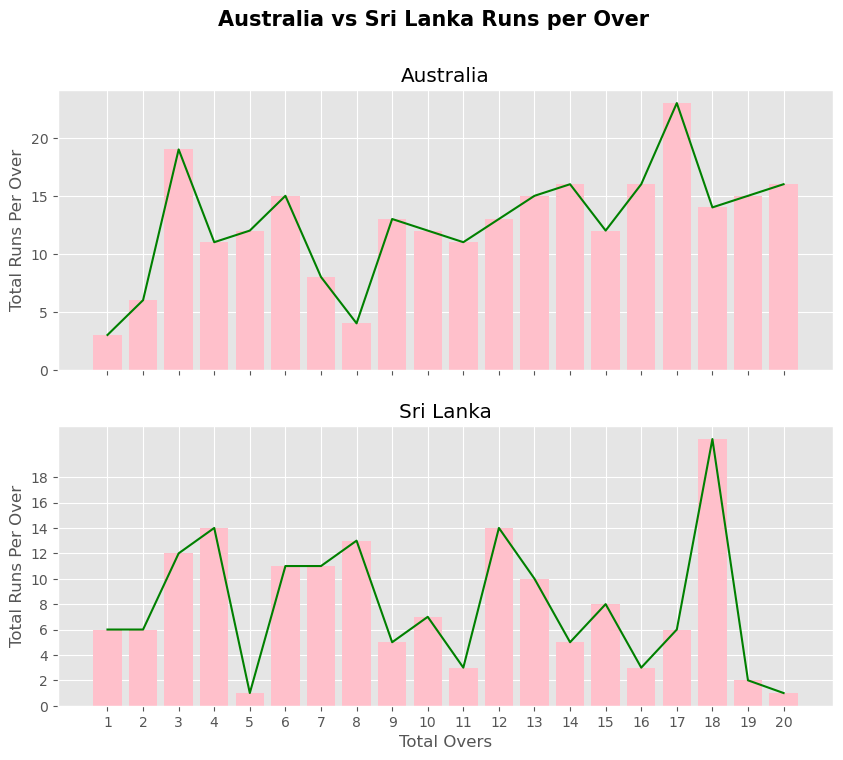

In [383]:
plt.style.use("ggplot")
first_innings, second_innings, bat_title_first, bat_title_second = status(match_id)
fig, (ax0, ax1) = plt.subplots(nrows= 2, ncols= 1, figsize = (10, 8), sharex= True)
ax0.bar(np.arange(1, 21), first_innings, color = "Pink");
ax0.plot(np.arange(1, 21), first_innings, c = "Green");
ax0.set(xticks=(range(1, 21)), title= bat_title_first, ylabel = "Total Runs Per Over");
ax1.bar(np.arange(1, 21), second_innings, color = "Pink");
ax1.plot(np.arange(1, 21), second_innings, c = "Green");
ax1.set(xticks=(range(1, 21)), title = bat_title_second, ylabel = "Total Runs Per Over");
ax1.set(xlabel = "Total Overs")
plt.yticks(range(0, 20, 2));
fig.suptitle(f"{bat_title_first} vs {bat_title_second} Runs per Over", fontsize = 15, fontweight = "bold");

### Creating Target Label from the parameters

Combining Runs, Extras, Byes, Wides Wicket columns into a single column for prediction.

In [384]:
df_func = df[["runs_off_bat", "extras", "wicket_type"]]
df_func.head()

,runs_off_bat,extras,wicket_type
0,0,0,NaN
1,0,0,NaN
2,1,0,NaN
3,2,0,NaN
4,0,0,NaN


In [385]:
df_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   runs_off_bat  402021 non-null  int64 
 1   extras        402021 non-null  int64 
 2   wicket_type   22282 non-null   object
dtypes: int64(2), object(1)
memory usage: 9.2+ MB


In [386]:
for label, content in df_func.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_func[label] = content.fillna(0)

In [387]:
df_func["wicket_type"].unique()

array([0, 'caught', 'run out', 'stumped', 'lbw', 'caught and bowled',
       'bowled', 'retired hurt', 'obstructing the field', 'hit wicket',
       'retired out', 'retired not out'], dtype=object)

In [388]:
# for index, value in enumerate(df_func["wicket_type"]):
#     if value != 0:
#         df_func["wicket_type"].iloc[index] = "Wicket"

In [389]:
# df_func["wicket_type"].unique()

In [390]:
# for index, value in enumerate(df_func["runs_off_bat"]):
#     if value != 0:
#         df_func["runs_off_bat"].iloc[index] = "Run"

In [391]:
df_func["runs_off_bat"].unique()

array([0, 1, 2, 3, 4, 6, 5, 7], dtype=int64)

In [392]:
df_func["extras"].unique()

array([0, 1, 5, 4, 2, 3], dtype=int64)

In [393]:
# for index, value in enumerate(df_func["extras"]):
#     if value != 0:
#         df_func["extras"].iloc[index] = "Run"

In [394]:
df_func["extras"].unique()

array([0, 1, 5, 4, 2, 3], dtype=int64)

In [395]:
df_func.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   runs_off_bat  402021 non-null  int64 
 1   extras        402021 non-null  int64 
 2   wicket_type   402021 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.2+ MB


In [396]:
df_func["target"] = 0

In [397]:
for label, content in df_func.items():
    for index, value in enumerate(content):
        if value != 0:
            if df_func["target"].iloc[index] == 0:        
                df_func["target"].iloc[index] = value
            else:
                df_func["target"].iloc[index] = value

In [398]:
df_func["target"].unique()

array([0, 1, 2, 3, 4, 6, 'caught', 'run out', 5, 'stumped', 'lbw',
       'caught and bowled', 'bowled', 'retired hurt',
       'obstructing the field', 'hit wicket', 'retired out',
       'retired not out', 7], dtype=object)

In [399]:
df_func["target"].tail(30)

401991         1
401992         0
401993         1
401994         1
401995         1
401996         0
401997         1
401998         0
401999         1
402000         1
402001         1
402002         1
402003       lbw
402004         1
402005         1
402006         1
402007         0
402008         0
402009         0
402010         0
402011         3
402012         0
402013         1
402014         0
402015    caught
402016         1
402017         3
402018         0
402019         0
402020         6
Name: target, dtype: object

In [400]:
df_func_exp = df_func.copy()

## Data Pre-processing

### Checking for Null Values

In [401]:
df.isna().sum()/len(df)

match_id                  0.000000
season                    0.000000
start_date                0.000000
venue                     0.000000
innings                   0.000000
ball                      0.000000
batting_team              0.000000
bowling_team              0.000000
striker                   0.000000
non_striker               0.000000
bowler                    0.000000
runs_off_bat              0.000000
extras                    0.000000
wides                     0.964848
noballs                   0.995630
byes                      0.996162
legbyes                   0.984150
penalty                   0.999983
wicket_type               0.944575
player_dismissed          0.944575
other_wicket_type         1.000000
other_player_dismissed    1.000000
dtype: float64

In [402]:
df_tmp = df.copy()

In [403]:
df_tmp.drop(["runs_off_bat", "extras", "wides", "noballs", "byes", "penalty", "legbyes", "wicket_type", 
             "other_wicket_type", "other_player_dismissed"], axis = 1, inplace = True)

In [404]:
#df_tmp.sort_values(by=["start_date"], inplace=True, ascending=True)
df_tmp.start_date.head(20)

0    2017-02-17
1    2017-02-17
2    2017-02-17
3    2017-02-17
4    2017-02-17
5    2017-02-17
6    2017-02-17
7    2017-02-17
8    2017-02-17
9    2017-02-17
10   2017-02-17
11   2017-02-17
12   2017-02-17
13   2017-02-17
14   2017-02-17
15   2017-02-17
16   2017-02-17
17   2017-02-17
18   2017-02-17
19   2017-02-17
Name: start_date, dtype: datetime64[ns]

In [405]:
df_tmp.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,player_dismissed
0,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.1,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,NaN
1,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.2,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,NaN
2,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.3,Australia,Sri Lanka,AJ Finch,M Klinger,SL Malinga,NaN
3,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.4,Australia,Sri Lanka,M Klinger,AJ Finch,SL Malinga,NaN
4,1001349,2016/17,2017-02-17,Melbourne Cricket Ground,1,0.5,Australia,Sri Lanka,M Klinger,AJ Finch,SL Malinga,NaN


### Date Parsing

In [406]:
df_tmp["seasonYear"] = df_tmp.start_date.dt.year
df_tmp["seasonMonth"] = df_tmp.start_date.dt.month
df_tmp["seasonDay"] = df_tmp.start_date.dt.day

In [407]:
df_tmp.head().T

,0,1,2,3,4
match_id,1001349,1001349,1001349,1001349,1001349
season,2016/17,2016/17,2016/17,2016/17,2016/17
start_date,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00,2017-02-17 00:00:00
venue,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground,Melbourne Cricket Ground
innings,1,1,1,1,1
ball,0.1,0.2,0.3,0.4,0.5
batting_team,Australia,Australia,Australia,Australia,Australia
bowling_team,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka,Sri Lanka
striker,AJ Finch,AJ Finch,AJ Finch,M Klinger,M Klinger
non_striker,M Klinger,M Klinger,M Klinger,AJ Finch,AJ Finch


In [408]:
df_tmp.drop(["start_date", "season"], axis = 1, inplace = True)

In [409]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          402021 non-null  int64  
 1   venue             402021 non-null  object 
 2   innings           402021 non-null  int64  
 3   ball              402021 non-null  float64
 4   batting_team      402021 non-null  object 
 5   bowling_team      402021 non-null  object 
 6   striker           402021 non-null  object 
 7   non_striker       402021 non-null  object 
 8   bowler            402021 non-null  object 
 9   player_dismissed  22282 non-null   object 
 10  seasonYear        402021 non-null  int64  
 11  seasonMonth       402021 non-null  int64  
 12  seasonDay         402021 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 39.9+ MB


In [410]:
df_exp = df_tmp.copy()

In [411]:
df_tmp["target"] = df_func["target"]

### Converting String datatypes

Changing the object datatypes into categorical datatype to access the rows using categorical codes.

In [412]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

venue
batting_team
bowling_team
striker
non_striker
bowler
player_dismissed
target


In [413]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [414]:
df_tmp.isna().sum()/len(df)

match_id            0.000000
venue               0.000000
innings             0.000000
ball                0.000000
batting_team        0.000000
bowling_team        0.000000
striker             0.000000
non_striker         0.000000
bowler              0.000000
player_dismissed    0.944575
seasonYear          0.000000
seasonMonth         0.000000
seasonDay           0.000000
target              0.000000
dtype: float64

## Feature Engineering

### Filling Missing Values

In [415]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
            print(label)

player_dismissed


In [416]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

In [417]:
df_tmp.isna().sum()/len(df)

match_id            0.0
venue               0.0
innings             0.0
ball                0.0
batting_team        0.0
bowling_team        0.0
striker             0.0
non_striker         0.0
bowler              0.0
player_dismissed    0.0
seasonYear          0.0
seasonMonth         0.0
seasonDay           0.0
target              0.0
dtype: float64

In [418]:
df_tmp

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,player_dismissed,seasonYear,seasonMonth,seasonDay,target
0,1001349,126,1,0.1,3,82,123,1431,1673,0,2017,2,17,1
1,1001349,126,1,0.2,3,82,123,1431,1673,0,2017,2,17,1
2,1001349,126,1,0.3,3,82,123,1431,1673,0,2017,2,17,2
3,1001349,126,1,0.4,3,82,1444,126,1673,0,2017,2,17,3
4,1001349,126,1,0.5,3,82,1444,126,1673,0,2017,2,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402016,995469,156,2,17.1,3,82,2512,1897,1701,0,2016,9,9,2
402017,995469,156,2,17.2,3,82,1916,2481,1701,0,2016,9,9,4
402018,995469,156,2,17.3,3,82,2512,1897,1701,0,2016,9,9,1
402019,995469,156,2,17.4,3,82,2512,1897,1701,0,2016,9,9,1


In [419]:
df_tmp.seasonYear.unique()

array([2017, 2016, 2018, 2019, 2020, 2021, 2022, 2023, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [420]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402021 entries, 0 to 402020
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          402021 non-null  int64  
 1   venue             402021 non-null  int16  
 2   innings           402021 non-null  int64  
 3   ball              402021 non-null  float64
 4   batting_team      402021 non-null  int8   
 5   bowling_team      402021 non-null  int8   
 6   striker           402021 non-null  int16  
 7   non_striker       402021 non-null  int16  
 8   bowler            402021 non-null  int16  
 9   player_dismissed  402021 non-null  int16  
 10  seasonYear        402021 non-null  int64  
 11  seasonMonth       402021 non-null  int64  
 12  seasonDay         402021 non-null  int64  
 13  target            402021 non-null  int8   
dtypes: float64(1), int16(5), int64(5), int8(3)
memory usage: 23.4 MB


In [421]:
df_tmp.target.unique()

array([ 1,  2,  3,  4,  5,  7, 10, 18,  6, 19, 13, 11,  9, 15, 14, 12, 17,
       16,  8], dtype=int8)

### Splitting the Dataset

In [422]:
df_test = df_tmp[df_tmp.seasonYear == 2023]
df_train = df_tmp[df_tmp.seasonYear != 2023]

In [423]:
X_train, y_train = df_train.drop("target", axis=1), df_train.target
X_test, y_test = df_test.drop("target", axis=1), df_test.target

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((395525, 13), (395525,), (6496, 13), (6496,))

In [424]:
X_train

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,player_dismissed,seasonYear,seasonMonth,seasonDay
0,1001349,126,1,0.1,3,82,123,1431,1673,0,2017,2,17
1,1001349,126,1,0.2,3,82,123,1431,1673,0,2017,2,17
2,1001349,126,1,0.3,3,82,123,1431,1673,0,2017,2,17
3,1001349,126,1,0.4,3,82,1444,126,1673,0,2017,2,17
4,1001349,126,1,0.5,3,82,1444,126,1673,0,2017,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402016,995469,156,2,17.1,3,82,2512,1897,1701,0,2016,9,9
402017,995469,156,2,17.2,3,82,1916,2481,1701,0,2016,9,9
402018,995469,156,2,17.3,3,82,2512,1897,1701,0,2016,9,9
402019,995469,156,2,17.4,3,82,2512,1897,1701,0,2016,9,9


In [425]:
X_test

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,player_dismissed,seasonYear,seasonMonth,seasonDay
269500,1348323,79,1,0.1,40,95,6,863,1865,0,2023,1,12
269501,1348323,79,1,0.2,40,95,6,863,1865,0,2023,1,12
269502,1348323,79,1,0.3,40,95,869,6,1865,0,2023,1,12
269503,1348323,79,1,0.4,40,95,869,6,1865,0,2023,1,12
269504,1348323,79,1,0.5,40,95,6,863,1865,0,2023,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281331,1359802,17,2,19.2,16,2,496,2437,61,0,2023,3,4
281332,1359802,17,2,19.3,16,2,2467,493,61,0,2023,3,4
281333,1359802,17,2,19.4,16,2,496,2437,61,0,2023,3,4
281334,1359802,17,2,19.5,16,2,496,2437,61,0,2023,3,4


In [426]:
y_test

269500    1
269501    2
269502    1
269503    2
269504    1
         ..
281331    2
281332    2
281333    1
281334    3
281335    2
Name: target, Length: 6496, dtype: int8

## Modelling

### Model Training Function

* Logistic Regression
* KNN
* Random Forest Classifier

In [427]:
model_dict = {"Logistic Regression" : LogisticRegression(),
        "KNN" : KNeighborsClassifier(),
        "Random Forest Classifier" : RandomForestClassifier()}

def model_fit_and_score(model, X_train, y_train, X_test, y_test):
    np.random.seed(seed = 45)
    model_score = {}
    for keys, value in model.items():
        value.fit(X_train, y_train)
        model_score[keys] = value.score(X_test, y_test)
    return model_score

In [428]:
model_score = model_fit_and_score(model, X_train, y_train, X_test, y_test)

### Model Score

In [429]:
model_score

{'Logistic Regression': 0.37546182266009853,
 'KNN': 0.3565270935960591,
 'Random Forest Classifier': 0.4444273399014778}

In [430]:
model_compare = pd.DataFrame(model_score.values(), index = model_score.keys(), columns= ["Score"])
model_compare

,Score
Logistic Regression,0.375462
KNN,0.356527
Random Forest Classifier,0.444427


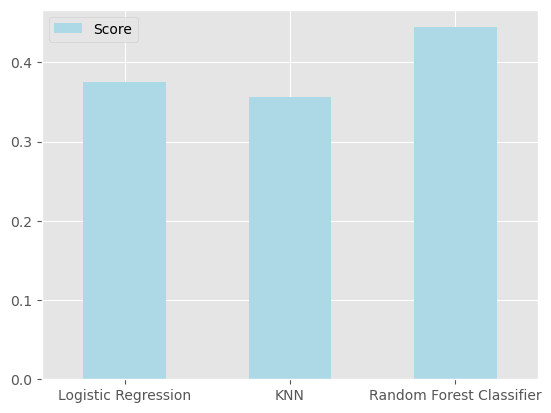

In [431]:
model_compare.plot(kind = "bar", color = ["lightblue"])
plt.xticks(rotation = 0);

## Hyper-parameter Tuning

### Manual Tuning for KNN

In [432]:
knn = KNeighborsClassifier()

neighbours = np.arange(1, 20)
train_score = []
test_score = []

for i in neighbours:
    np.random.seed(seed = 45)
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

knn_score = pd.DataFrame(train_score, columns= ["Train Score"])
knn_score["Test Score"] = test_score
knn_score

,Train Score,Test Score
0,0.999942,0.320659
1,0.661925,0.360376
2,0.622929,0.369150
3,0.592243,0.352525
4,0.571590,0.356527
5,0.554301,0.361299
6,0.543462,0.361453
7,0.533767,0.363608
8,0.525848,0.365610
9,0.519646,0.365148


Maximum test score obtained 38.53%


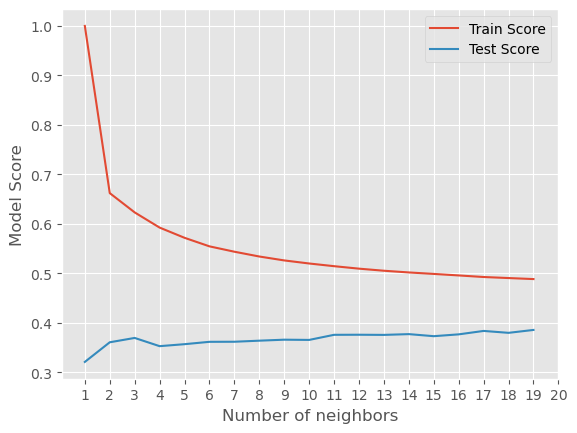

In [433]:
plt.plot(neighbours, train_score)
plt.plot(neighbours, test_score)
plt.xticks(np.arange(1,21));
plt.legend(["Train Score", "Test Score"]);
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
print(f"Maximum test score obtained {max(test_score)*100:.2f}%")

### Random SearchCV

In [434]:
rs_log_param = {"C" : np.logspace(4, 4, 20),
            "solver" : ["liblinear"]}

rs_rf_param = {"n_estimators": np.arange(10, 1000, 50),
              "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

knn_param = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#### RandomSearch for KNN Classifier

In [435]:
np.random.seed(seed = 45)
rs_knn = RandomizedSearchCV(KNeighborsClassifier() , cv = 5, param_distributions = knn_param, n_iter = 2, verbose = True)
rs_knn.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=2,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]},
                   verbose=True)

In [436]:
rs_knn.best_params_

{'p': 1, 'n_neighbors': 14, 'leaf_size': 43}

In [437]:
rs_knn_score = rs_knn.score(X_test, y_test)
rs_knn_score

0.3877770935960591

#### Randomsearch for Logistic Regression

In [438]:
np.random.seed(seed = 45)
rs_logr = RandomizedSearchCV(LogisticRegression(), cv = 5, n_iter = 3, param_distributions = rs_log_param, verbose = True)
rs_logr.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=3,
                   param_distributions={'C': array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000.]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [439]:
rs_logr.score(X_test, y_test)

0.40132389162561577

#### RandomSearchCV for Random Forest Classifier

In [440]:
np.random.seed(seed = 45)
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), cv = 5, param_distributions = rs_rf_param, n_iter = 3, verbose = True)
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [441]:
rs_rfc.best_params_

{'n_estimators': 760,
 'min_samples_split': 10,
 'min_samples_leaf': 19,
 'max_depth': 10}

In [442]:
rs_rfc.score(X_test, y_test)

0.4664408866995074

In [443]:
y_preds = rs_rfc.predict(X_test)

Since RandomForest Classifier score is higher than the other algoirthm, evaluating the model to find insights and success
rate for the model

## Evaluating The Model

### Classification Report

In [444]:
def get_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [445]:
get_classification_report(y_test, y_preds)

,precision,recall,f1-score,support
10,0.579235,1.000000,0.733564,212.000000
2,0.445969,0.746207,0.558282,2439.000000
accuracy,0.466441,0.466441,0.466441,0.466441
1,0.487067,0.420742,0.451482,2372.000000
weighted avg,0.364199,0.466441,0.398411,6496.000000
macro avg,0.116329,0.166688,0.134102,6496.000000
3,0.000000,0.000000,0.000000,452.000000
4,0.000000,0.000000,0.000000,36.000000
5,0.000000,0.000000,0.000000,571.000000
6,0.000000,0.000000,0.000000,12.000000


### Confusion Matrix

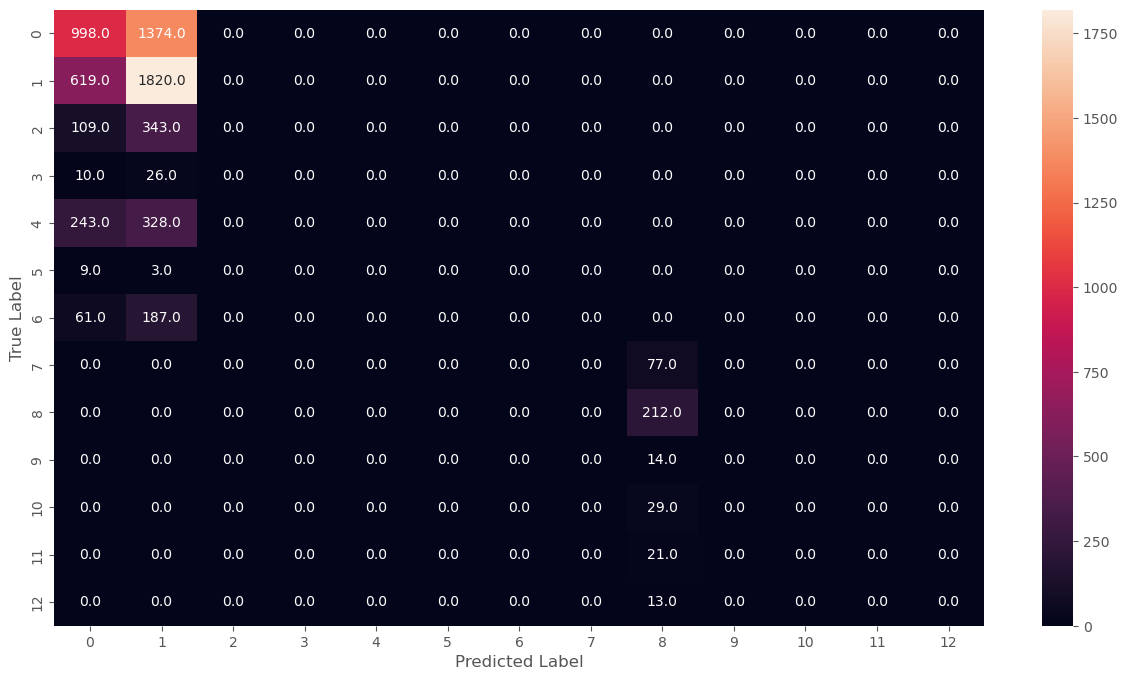

In [446]:
y_preds = rs_rfc.predict(X_test)
matrix = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize = (15, 8))
ax = sns.heatmap(matrix, annot= True, fmt = '.1f')
ax.set(xlabel= "Predicted Label", ylabel = "True Label");

After evaluating, it is clear the model doesn't perform well due to large class imbalance and multi-label. Hence reducing the number of classes with equal weight.

## Experimentation to reduce Class labels

Jumping back to the dataset to reduce the class labels and improve the score of the model. The performance is low due to class imbalance.

In [447]:
df_func_exp["target"].unique()

array([0, 1, 2, 3, 4, 6, 'caught', 'run out', 5, 'stumped', 'lbw',
       'caught and bowled', 'bowled', 'retired hurt',
       'obstructing the field', 'hit wicket', 'retired out',
       'retired not out', 7], dtype=object)

In [448]:
df_func_exp[df_func_exp["target"] == 4]["target"].value_counts(), df_func_exp[df_func_exp["target"] == 6]["target"].value_counts()

(4    39612
 Name: target, dtype: int64,
 6    16213
 Name: target, dtype: int64)

## EDA

### Exploring the target variable for 4 and 6's for each match

In [449]:
def runs(match):
    match_details = df[df["match_id"] == match]
    first_innings = match_details[match_details["innings"] == 1]
    second_innings = match_details[match_details["innings"] == 2]
    li = []
    li2 = []
    bat_team_first_innings = first_innings["batting_team"].iloc[0]
    bat_team_second_innings = second_innings["batting_team"].iloc[0]
    
    for index, value in enumerate(first_innings["runs_off_bat"]):
        if value == 4 or value == 6 or value == 1 or value == 2:
            li.append(value)
        else:
            li.append(0)

    for index, value in enumerate(second_innings["runs_off_bat"]):
        if value == 4 or value == 6 or value == 1 or value == 2:
            li2.append(value)
        else:
            li2.append(0)
    return first_innings, second_innings, li, li2, bat_team_first_innings, bat_team_second_innings

In [450]:
try:
    match_id = int(input("Enter the match ID:"))
except:
    print("Enter a valid ID")

Enter the match ID:995467


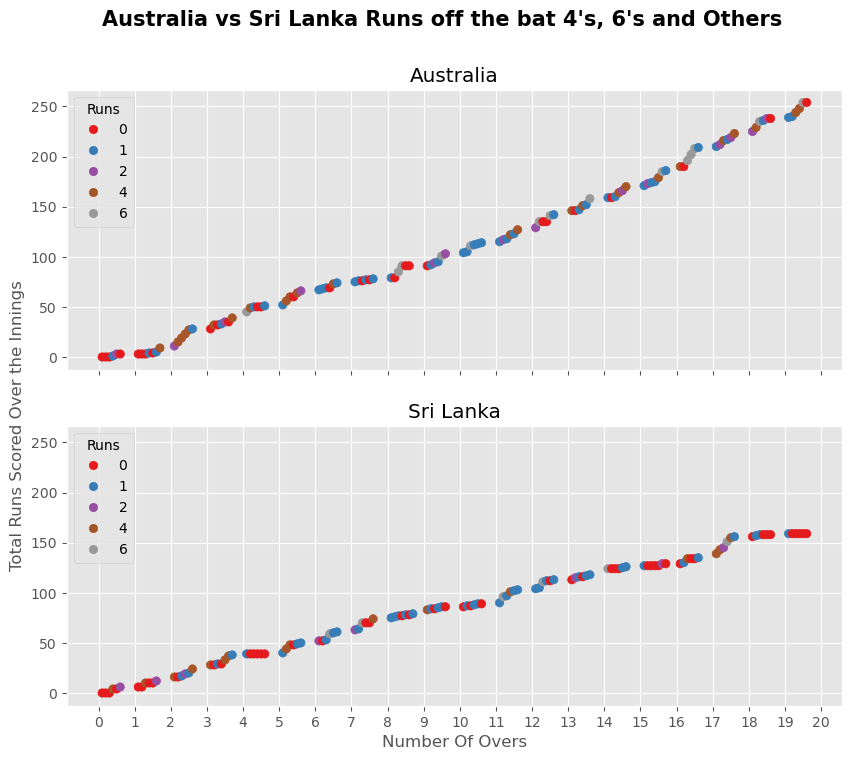

In [451]:
first_inning, second_inning,li, li2, bat_title_first, bat_title_second = runs(match_id)

fig, (ax0, ax1) = plt.subplots(nrows= 2, ncols= 1, figsize = (10, 8), sharex= True, sharey= True)
scatter1 = ax0.scatter(first_inning["ball"], first_inning["runs_off_bat"].cumsum(), c = li, cmap = "Set1");
ax0.legend(*scatter1.legend_elements(), title = "Runs");
ax0.set(title= bat_title_first)
ax1.set(xticks= range(0, 21), ylabel = "Total Runs Score Over the Innings", xlabel = "Number Of Overs", 
        title= bat_title_second);
scatter2 = ax1.scatter(second_inning["ball"], second_inning["runs_off_bat"].cumsum(), c = li2, cmap = "Set1");
ax1.legend(*scatter2.legend_elements(), title = "Runs");
plt.ylabel('Total Runs Scored Over the Innings',horizontalalignment='center', y=1.0);
fig.suptitle(f"{bat_title_first} vs {bat_title_second} Runs off the bat 4's, 6's and Others", 
             fontsize = 15, fontweight = "bold");

### Finding and labelling 4 and 6's in the target variable

In [452]:
for index, value in enumerate(df_func_exp["target"]):
    if value != 6:
        if value != 4:
            df_func_exp["target"][index] = 0

In [453]:
df_func_exp["target"].value_counts()

0    346196
4     39612
6     16213
Name: target, dtype: int64

In [454]:
df_func_exp.shape

(402021, 4)

In [455]:
df_exp.shape

(402021, 13)

In [456]:
df_exp["target"] = df_func_exp["target"].values

In [457]:
df_exp.target.unique()

array([0, 4, 6], dtype=object)

In [458]:
df_exp.drop(df_exp[df_exp["target"] == 0].index, inplace = True)

In [459]:
df_exp.target.head

<bound method NDFrame.head of 10        4
16        4
22        4
26        4
27        4
         ..
401945    4
401946    4
401947    4
401952    4
402020    6
Name: target, Length: 55825, dtype: object>

In [460]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55825 entries, 10 to 402020
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          55825 non-null  int64  
 1   venue             55825 non-null  object 
 2   innings           55825 non-null  int64  
 3   ball              55825 non-null  float64
 4   batting_team      55825 non-null  object 
 5   bowling_team      55825 non-null  object 
 6   striker           55825 non-null  object 
 7   non_striker       55825 non-null  object 
 8   bowler            55825 non-null  object 
 9   player_dismissed  0 non-null      object 
 10  seasonYear        55825 non-null  int64  
 11  seasonMonth       55825 non-null  int64  
 12  seasonDay         55825 non-null  int64  
 13  target            55825 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 6.4+ MB


### Data Pre-processing 

Cleaning the data again because we have new sets of variables and change in prediction column

In [461]:
for label, content in df_exp.items():
    if pd.api.types.is_string_dtype(content):
        df_exp[label] = content.astype("category").cat.as_ordered()

In [462]:
for label, content in df_exp.items():
    if not pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
            print(label)

player_dismissed


In [463]:
for label, content in df_exp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        if pd.isnull(content).sum():
            df_exp[label] = pd.Categorical(content).codes + 1
        else:
            df_exp[label] = pd.Categorical(content).codes

In [464]:
df_exp.isna().sum()/len(df_exp)

match_id            0.0
venue               0.0
innings             0.0
ball                0.0
batting_team        0.0
bowling_team        0.0
striker             0.0
non_striker         0.0
bowler              0.0
player_dismissed    0.0
seasonYear          0.0
seasonMonth         0.0
seasonDay           0.0
target              0.0
dtype: float64

In [465]:
df_exp["player_dismissed"]

10        0
16        0
22        0
26        0
27        0
         ..
401945    0
401946    0
401947    0
401952    0
402020    0
Name: player_dismissed, Length: 55825, dtype: int8

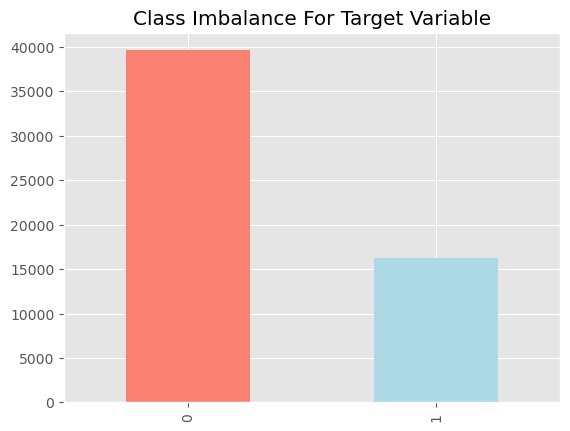

In [466]:
df_exp["target"].value_counts().plot(kind = "bar", color = ["Salmon", "Lightblue"], 
                                     title = "Class Imbalance For Target Variable");

### Dealing with class imbalance

### Resampling

In [467]:
df_majority = df_exp[df_exp["target"] == 0]
df_minority = df_exp[df_exp["target"] == 1]

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 39612, random_state = 45)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

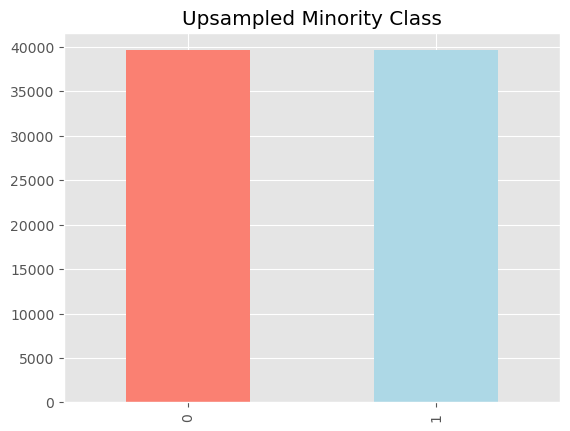

In [468]:
df_upsampled["target"].value_counts().plot(kind = "bar", color = ["Salmon", "Lightblue"], title = "Upsampled Minority Class");

In [469]:
# df_upsampled.sort_index(inplace = True)

## Splitting the Dataset

In [502]:
df_exp_test = df_upsampled[df_upsampled.seasonYear == 2023]
df_exp_train = df_upsampled[df_upsampled.seasonYear != 2023]

In [503]:
X_train, y_train = df_exp_train.drop("target", axis=1), df_exp_train.target
X_test, y_test = df_exp_test.drop("target", axis=1), df_exp_test.target

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((78030, 13), (78030,), (1194, 13), (1194,))

In [504]:
X_train

,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,player_dismissed,seasonYear,seasonMonth,seasonDay
10,1001349,125,1,1.5,2,81,97,1207,941,0,2017,2,17
16,1001349,125,1,2.5,2,81,1136,100,854,0,2017,2,17
22,1001349,125,1,3.5,2,81,1136,100,941,0,2017,2,17
26,1001349,125,1,4.3,2,81,1136,100,854,0,2017,2,17
27,1001349,125,1,4.4,2,81,1136,100,854,0,2017,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401945,995469,155,2,5.4,2,81,683,527,1274,0,2016,9,9
401946,995469,155,2,5.5,2,81,683,527,1274,0,2016,9,9
401947,995469,155,2,5.6,2,81,683,527,1274,0,2016,9,9
401952,995469,155,2,6.5,2,81,683,527,1556,0,2016,9,9


## Modelling through Experimentation

In [505]:
model_exp_score = model_fit_and_score(model_dict, X_train, y_train, X_test, y_test)

In [506]:
model_exp_score

{'Logistic Regression': 0.5150753768844221,
 'KNN': 0.49413735343383586,
 'Random Forest Classifier': 0.49246231155778897}

In [507]:
model_exp_compare = pd.DataFrame(model_exp_score.values(), index = model_exp_score.keys(), columns= ["Score"])
model_exp_compare

,Score
Logistic Regression,0.515075
KNN,0.494137
Random Forest Classifier,0.492462


Dropping KNN due to score and using AdaBoostClassifier to replace it

### Randomized SearchCV for AdaBoost Classifier

In [508]:
ada_params = {"n_estimators" : range(100, 1100, 100),
             "algorithm" : ["SAMME", "SAMME.R"],
             "learning_rate" : np.arange(1, 10, 2)}
np.random.seed(seed = 45)
rs_ada = RandomizedSearchCV(AdaBoostClassifier(), cv = 5, n_iter= 2, param_distributions = ada_params, verbose = True)
rs_ada.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=2,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': array([1, 3, 5, 7, 9]),
                                        'n_estimators': range(100, 1100, 100)},
                   verbose=True)

In [509]:
rs_ada.score(X_test, y_test)

0.5653266331658291

## Hyperparameter Tuning using GridSearch CV

### Logistic Regression and Randomforest Classifier

In [510]:
gs_log_param = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['none', 'elasticnet', 'l1', 'l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gs_rf_param = {'n_estimators': [910],
 'min_samples_split': [16],
 'min_samples_leaf': [17],
 'max_depth': [3]}

In [511]:
np.random.seed(seed = 45)

gs_logr = GridSearchCV(LogisticRegression(), param_grid = gs_log_param, cv = 5, verbose = True)

#fit the model
gs_logr.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [512]:
gs_logr.score(X_test, y_test)

0.5938023450586265

In [513]:
np.random.seed(seed = 45)

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid = gs_rf_param, cv = 5, verbose = True)

#fit the model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3], 'min_samples_leaf': [17],
                         'min_samples_split': [16], 'n_estimators': [910]},
             verbose=True)

In [514]:
gs_rf.score(X_test, y_test)

0.585427135678392

### Catboost and XGboost

In [515]:
np.random.seed(seed = 45)
cbc_model = CatBoostClassifier()
cbc_model.fit(X_train, y_train)

Learning rate set to 0.066211
0:	learn: 0.6901770	total: 24.6ms	remaining: 24.5s
1:	learn: 0.6874048	total: 41.1ms	remaining: 20.5s
2:	learn: 0.6851055	total: 59ms	remaining: 19.6s
3:	learn: 0.6829478	total: 80.7ms	remaining: 20.1s
4:	learn: 0.6811358	total: 97.4ms	remaining: 19.4s
5:	learn: 0.6796422	total: 117ms	remaining: 19.4s
6:	learn: 0.6783288	total: 134ms	remaining: 19s
7:	learn: 0.6770410	total: 152ms	remaining: 18.9s
8:	learn: 0.6759637	total: 172ms	remaining: 18.9s
9:	learn: 0.6750156	total: 190ms	remaining: 18.8s
10:	learn: 0.6739981	total: 214ms	remaining: 19.3s
11:	learn: 0.6731760	total: 232ms	remaining: 19.1s
12:	learn: 0.6723555	total: 253ms	remaining: 19.2s
13:	learn: 0.6715453	total: 270ms	remaining: 19.1s
14:	learn: 0.6708927	total: 291ms	remaining: 19.1s
15:	learn: 0.6702760	total: 312ms	remaining: 19.2s
16:	learn: 0.6696744	total: 331ms	remaining: 19.1s
17:	learn: 0.6691290	total: 352ms	remaining: 19.2s
18:	learn: 0.6685877	total: 369ms	remaining: 19s
19:	learn: 0

In [516]:
cbc_model.score(X_test, y_test)

0.5829145728643216

In [517]:
np.random.seed(seed = 45)
xgb_model = XGBRFClassifier()
xgb_model.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='binary:logistic', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [518]:
xgb_model.score(X_test, y_test)

0.5921273031825796

## Evaluating the experimented model

### Confusion Matrix

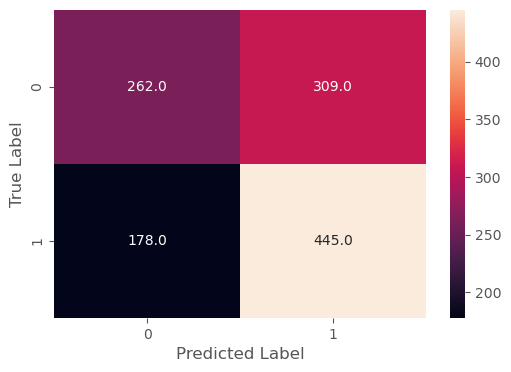

In [519]:
y_preds = xgb_model.predict(X_test)
matrix = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize = (6, 4))
ax = sns.heatmap(matrix, annot= True, fmt = '.1f')
ax.set(xlabel= "Predicted Label", ylabel = "True Label");

### AUC ROC Curve

In [520]:
y_preds_proba = xgb_model.predict_proba(X_test)

In [521]:
y_preds_proba

array([[0.6562893 , 0.34371072],
       [0.6424545 , 0.35754547],
       [0.6210762 , 0.37892377],
       ...,
       [0.41350335, 0.58649665],
       [0.35966712, 0.6403329 ],
       [0.3505404 , 0.6494596 ]], dtype=float32)

In [522]:
y_preds_positive = y_preds_proba[:, 1]
y_preds_positive

array([0.34371072, 0.35754547, 0.37892377, ..., 0.58649665, 0.6403329 ,
       0.6494596 ], dtype=float32)

In [523]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds_positive)

In [524]:
fpr, tpr

(array([0.        , 0.00175131, 0.00175131, 0.00175131, 0.00525394,
        0.00525394, 0.00700525, 0.00700525, 0.00875657, 0.00875657,
        0.00875657, 0.00875657, 0.01050788, 0.01050788, 0.01401051,
        0.01401051, 0.01751313, 0.01751313, 0.02101576, 0.02276708,
        0.02276708, 0.02276708, 0.02276708, 0.0262697 , 0.0262697 ,
        0.02977233, 0.03502627, 0.03677758, 0.0385289 , 0.04203152,
        0.04553415, 0.04728546, 0.05078809, 0.05078809, 0.06129597,
        0.06129597, 0.06304729, 0.06304729, 0.06830123, 0.06830123,
        0.07355517, 0.07355517, 0.07530648, 0.07880911, 0.08056042,
        0.08931699, 0.08931699, 0.09281961, 0.09281961, 0.09457093,
        0.09807356, 0.09982487, 0.1033275 , 0.10507881, 0.10683012,
        0.10683012, 0.10683012, 0.10683012, 0.10858144, 0.11033275,
        0.11208406, 0.11208406, 0.11383538, 0.11558669, 0.117338  ,
        0.117338  , 0.12259194, 0.12434326, 0.13134851, 0.13485114,
        0.13485114, 0.13485114, 0.13660245, 0.13

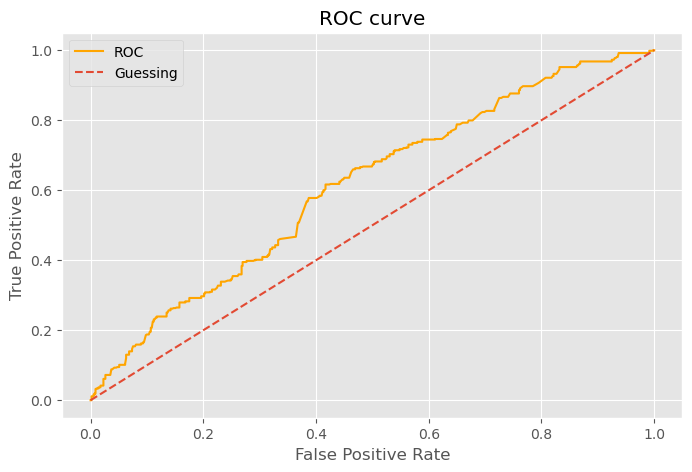

In [525]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(fpr, tpr, label = "ROC", color = "Orange")
ax.plot([0, 1], [0, 1], label = "Guessing", linestyle = "--")
ax.legend()
ax.set(title= "ROC curve", xlabel = "False Positive Rate", ylabel = "True Positive Rate");

### Classification Report

In [526]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52       571
           1       0.59      0.71      0.65       623

    accuracy                           0.59      1194
   macro avg       0.59      0.59      0.58      1194
weighted avg       0.59      0.59      0.59      1194



# Feature Importance

In [527]:
xgb_features = xgb_model.feature_importances_

In [528]:
xgb_features

array([0.0379983 , 0.02814925, 0.02872213, 0.6195801 , 0.06159049,
       0.02511233, 0.03790374, 0.02342716, 0.02754935, 0.        ,
       0.05426088, 0.03022151, 0.02548469], dtype=float32)

In [529]:
x_col  = X_train.columns

In [530]:
x_col

Index(['match_id', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team',
       'striker', 'non_striker', 'bowler', 'player_dismissed', 'seasonYear',
       'seasonMonth', 'seasonDay'],
      dtype='object')

In [531]:
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"], color = "Orange")
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

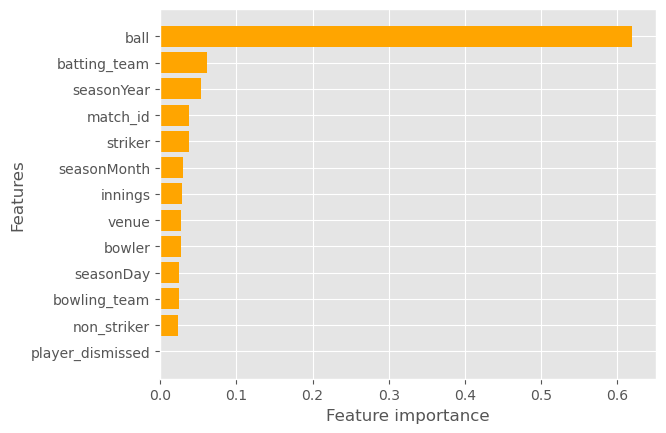

In [532]:
plot_features(x_col, xgb_features)

After evaluating the model using different classfication metrics, it is ideal to say that the performance and score of the model can be improved my tuning the hyperparamter in grid-search.

Algorithm used before experimentation

* Randomforest Classifier
* Logisitic Regression
* KNN Classifier

* RandomSearch CV for RandomForest Classifier and Logisitic Regression

Algorithms used after reducing the class labels to avoid class imbalance

* RandomizedSearch CV Adaboost classifier
* GridsearchCV Randomforest Classifier and Logisitic Regression

To reduce the training period after resampling the dataset, Catboost and XGBRGboost algorithms has been utilized.
Note : The computation period is affected only if GPU memory is used.

* Catboost Classifier
* XGBRG-boost Classifier

# Saving all the models

In [533]:
import pickle
pickle.dump(xgb_model, open("XGBoostRFClassifier_1.pkl", "wb"))
pickle.dump(gs_rf, open("GridSearchRandomForestClassifier_1.pk1", "wb"))